# Predictive Maintenance in Mechanical Systems
### A Conceptual Framework for Ethiopian Manufacturing Industries

This notebook implements a machine learning-based predictive maintenance system using simulated sensor data. The objective is to evaluate various classification algorithms in predicting machine failure, providing a conceptual foundation for Ethiopian manufacturing industries aiming to modernize their maintenance strategies.

### **Name**: *Naol Uso*
### **ID**: *59504*
### **Date**: *9/12/2024*
### **Group**: *GL04*
### **Department**: *Computer Scince*
### **MSc- Thesis** - "Predictive Maintenance in Mechanical Systems Using Machine Learning Techniques: A Conceptual Framework for Ethiopian Manufacturing Industries"

**Step 1: Load and Explore the Dataset**

In [1]:
# Install ydata-profiling (formerly pandas-profiling)
!pip install ydata-profiling

# Import pandas and ydata_profiling
import pandas as pd  # Pandas for data manipulation
# Import ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport


import matplotlib.pyplot as plt  # Matplotlib for data visualization
%matplotlib inline
import numpy as np  # NumPy for numerical operations
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns  # Seaborn for data visualization

# Import machine learning models
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # For binary classification
from sklearn.naive_bayes import MultinomialNB  # For multi-class classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier

# Import machine learning evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import tools for data splitting
from sklearn.model_selection import train_test_split

In [2]:

from google.colab import files
uploaded = files.upload()


Saving predictive_maintenance_dataset.csv.zip to predictive_maintenance_dataset.csv (1).zip


### Target Variable Explanation
The target variable `failure` is binary, where:
- `0` indicates normal operation
- `1` indicates a failure event

In [4]:
import zipfile
import os

zip_path = 'predictive_maintenance_dataset.csv.zip'  # Replace with the actual file name
extract_folder = '/content/dataset'  # Define where to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files extracted to {extract_folder}")


Files extracted to /content/dataset


In [5]:
import os

# List the extracted files
extracted_files = os.listdir(extract_folder)
print(extracted_files)


['predictive_maintenance_dataset.csv']


In [7]:
import os
import pandas as pd

# Read the dataset from the extracted location into a DataFrame
# Use os.path.join to correctly construct the path
filename = os.path.join(extract_folder, "predictive_maintenance_dataset.csv")
df = pd.read_csv(filename)

In [10]:
# Load the dataset
file_path = '/content/dataset/predictive_maintenance_dataset.csv'
df = pd.read_csv(file_path)

# Display first few rows (optional check)
df.head()


date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3

In [11]:
# Generate the profile report
profile = ProfileReport(df, title="Predictive Maintenance Dataset Report", explorative=True)

# Show it inside the notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:02<00:00,  5.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df.shape  # Result: (124494, 12)


(124494, 12)

In [13]:
df.drop_duplicates(inplace=True)


To address skewness in the data distribution, logarithmic or other nonlinear transformations can be applied to improve symmetry and facilitate more effective modeling."

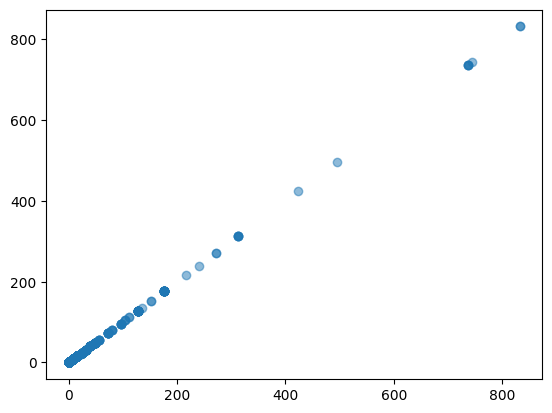

In [14]:
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)


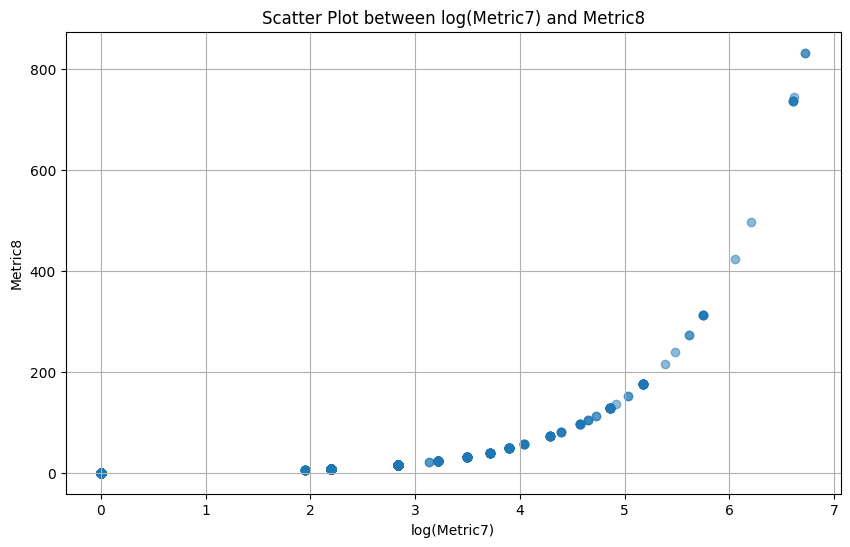

In [15]:
# Example if metric7 is skewed
df['log_metric7'] = np.log1p(df['metric7'])  # log1p handles zero values

# Then re-plot
plt.figure(figsize=(10, 6))
plt.scatter(df['log_metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between log(Metric7) and Metric8')
plt.xlabel('log(Metric7)')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()


In [16]:
df.describe()


failure       metric1        metric2        metric3  \
count  124493.000000  1.244930e+05  124493.000000  124493.000000   
mean        0.000851  1.223875e+08     159.493988       9.940977   
std         0.029167  7.045934e+07    2179.686488     185.748875   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128346e+07       0.000000       0.000000   
50%         0.000000  1.227971e+08       0.000000       0.000000   
75%         0.000000  1.833091e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

             metric4        metric5        metric6        metric7  \
count  124493.000000  124493.000000  124493.000000  124493.000000   
mean        1.741134      14.222719  260173.031022       0.292531   
std        22.908598      15.943082   99151.389285       7.436954   
min         0.000000       1.000000       8.000000       0.000000   
25%         0.000000       8.000000  221452.000000       0.000000   
50%         0.000000      10.000000  249800.000000       0.000000   
75%         0.000000      12.000000  310266.000000       0.000000   
max      1666.000000      98.000000  689161.000000     832.000000   

             metric8        metric9    log_metric7  
count  124493.000000  124493.000000  124493.000000  
mean        0.292531      13.013953       0.031560  
std         7.436954     275.662324       0.301827  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max       832.000000   70000.000000       6.725034

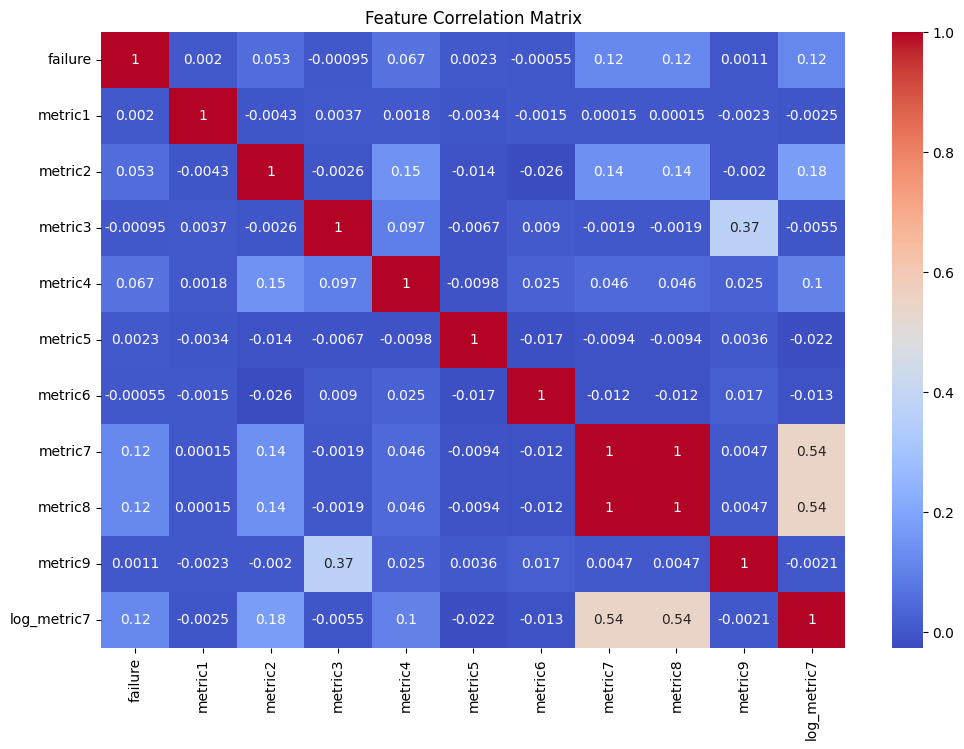

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [20]:
for num in ["2","3","4","7","8","9"]:
    df[f'metric{num}'] = np.log1p(df[f'metric{num}'])

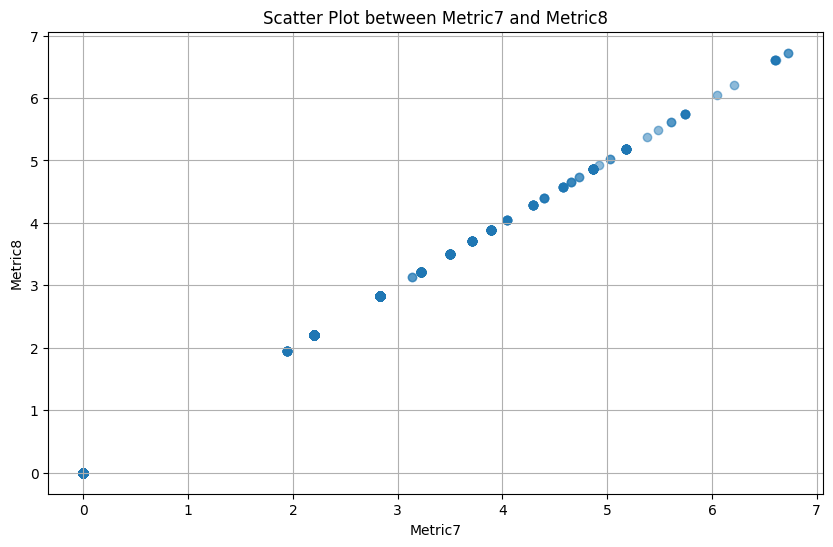

In [21]:
# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between Metric7 and Metric8')
plt.xlabel('Metric7')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()

Due to the strong similarity between Metric 7 and Metric 8, Metric 8 is removed to avoid redundancy in the dataset.

In [22]:
df.drop("metric8",axis=1,inplace=True)

In [23]:
def summarize_data(df):
    print("Number of rows and columns:", df.shape)
    print("\nColumns in the dataset:", df.columns)
    print("\nData types and missing values:")
    print(df.info())
    print("\nSummary statistics for numerical columns:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nUnique values in 'failure' column:")
    print(df['failure'].value_counts())

# Call the function to summarize the data
summarize_data(df)

Number of rows and columns: (124493, 12)

Columns in the dataset: Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric9', 'log_metric7'],
      dtype='object')

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 124493 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         124493 non-null  object 
 1   device       124493 non-null  object 
 2   failure      124493 non-null  int64  
 3   metric1      124493 non-null  int64  
 4   metric2      124493 non-null  float64
 5   metric3      124493 non-null  float64
 6   metric4      124493 non-null  float64
 7   metric5      124493 non-null  int64  
 8   metric6      124493 non-null  int64  
 9   metric7      124493 non-null  float64
 10  metric9      124493 non-null  float64
 11  log_metric7  124493 non-null  float64
dtypes: float64(6), int64

While the dataset contains no null values, the failure class is underrepresented, indicating a class imbalance that could affect model performance.

In [24]:
df["device"]

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: device, Length: 124493, dtype: object

Since the first four characters of the device ID appear to follow a consistent pattern, a new column was derived to capture this prefix for potential use in feature engineering.

In [25]:
df["device_model"]=df["device"].apply(lambda x : x[:4])
df["device_model"].value_counts()

device_model
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

What about rest of them ?

In [26]:
df["device_rest"]=df["device"].apply(lambda x : x[4:])
df["device_rest"].value_counts()[:20]

device_rest
E9EP    304
EGMT    304
QL3N    304
SJJ2    304
QLC1    304
FP0C    304
GGPP    304
GCED    304
5X69    304
FEH7    304
QK05    304
KYCR    304
JH87    304
GPXY    304
G9T7    304
FZPA    304
FGBQ    304
JXDL    304
MA1S    304
GE1M    304
Name: count, dtype: int64

In [27]:
df.drop("device",axis=1,inplace=True)

### Model Selection Rationale
A variety of classification models were tested to determine which is most effective in predicting failure. These include tree-based models (e.g., Random Forest, Gradient Boosting), linear models (e.g., Logistic Regression), and ensemble methods. Their performance is evaluated primarily using the F1-score to ensure balanced precision and recall.

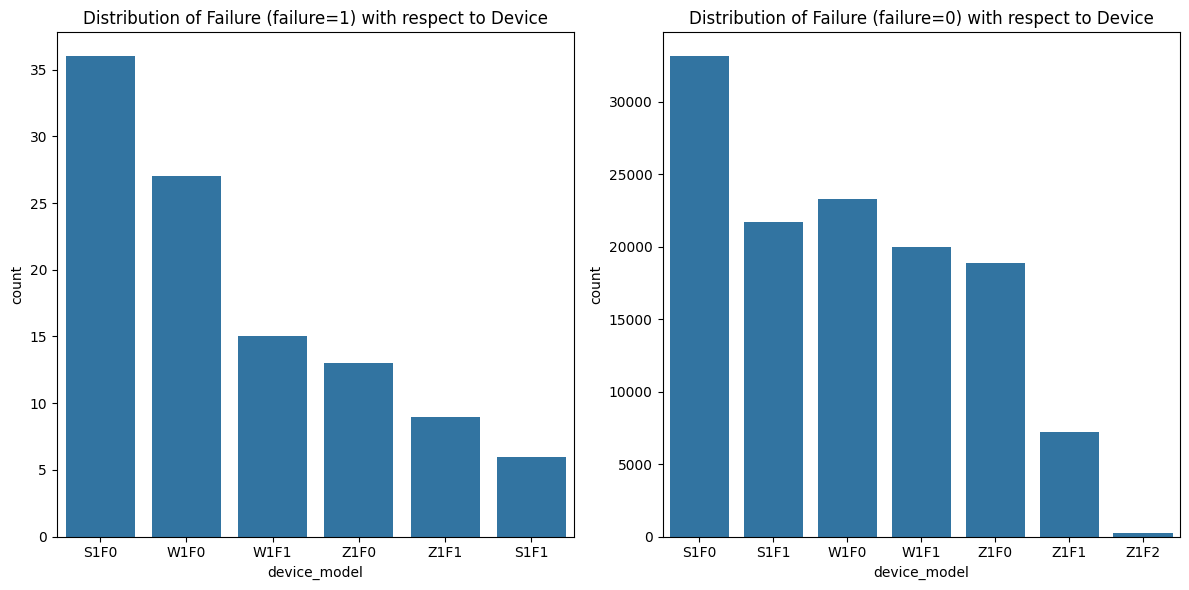

In [28]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
# Plot the distribution of 'failure' with respect to 'device' for failure=1
plt.subplot(1, 2, 1)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=1) with respect to Device')

# Plot the distribution of 'failure' with respect to 'device' for failure=0
plt.subplot(1, 2, 2)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 0])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Since there is no Z1F2 in target we could drop it for better results.

In [29]:
df.drop(df.loc[df["device_model"]=="Z1F2"].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df.tail()

date  failure    metric1   metric2   metric3   metric4  metric5  \
124237  11/2/2015        0   18310224  0.000000  0.000000  0.000000       10   
124238  11/2/2015        0  172556680  4.574711  4.682131  1.609438       11   
124239  11/2/2015        0   19029120  8.483223  0.000000  0.000000       11   
124240  11/2/2015        0  226953408  0.000000  0.000000  0.000000       12   
124241  11/2/2015        0   17572840  0.000000  0.000000  0.000000       10   

        metric6   metric7    metric9  log_metric7 device_model device_rest  
124237   353705  2.197225   0.000000     2.197225         Z1F0        MA1S  
124238   332792  0.000000   2.639057     0.000000         Z1F0        Q8RT  
124239   350410  0.000000   0.000000     0.000000         Z1F0        QK05  
124240   358980  0.000000   0.000000     0.000000         Z1F0        QL3N  
124241   351431  0.000000  11.156265     0.000000         Z1F0        QLC1

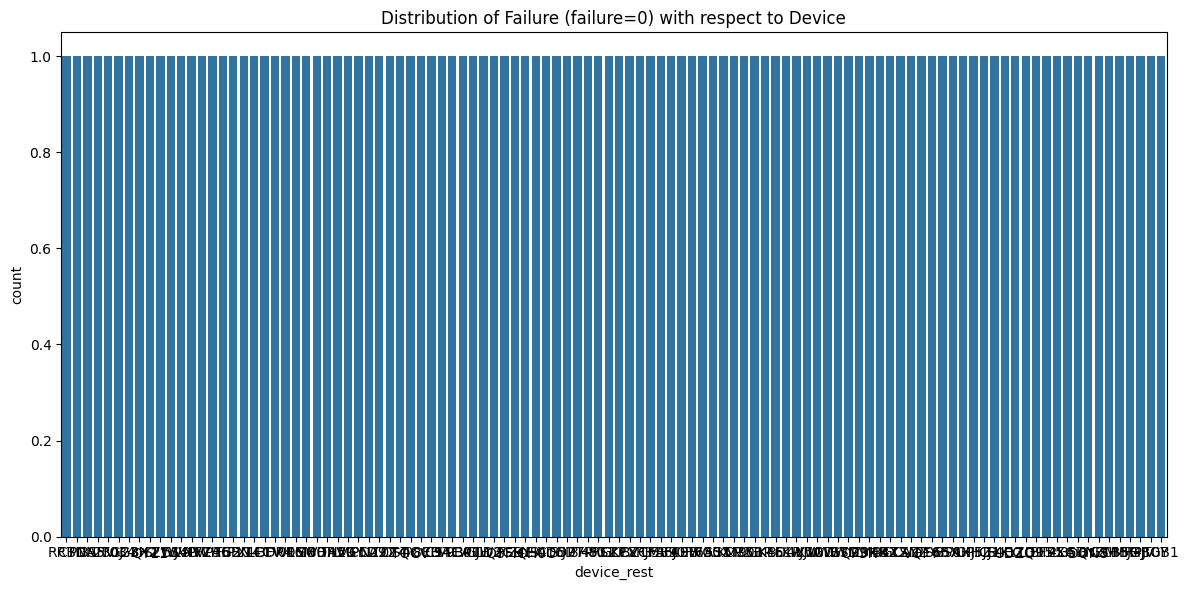

In [30]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
sns.countplot(x="device_rest", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Since nearly all instances associated with each device correspond to a single target class, this feature lacks predictive value and is dropped from the dataset.

In [31]:
df.drop("device_rest",axis=1,inplace=True)
df.sample(5)

date  failure    metric1  metric2   metric3   metric4  metric5  \
100075   7/7/2015        0  230615984      0.0  0.693147  0.000000        7   
13579   1/15/2015        0  216466776      0.0  0.000000  0.693147       21   
9497    1/10/2015        0   70592240      0.0  0.000000  0.000000       12   
5671     1/5/2015        0   48141736      0.0  0.000000  0.000000       10   
22291   1/28/2015        0   82148680      0.0  0.000000  0.000000        8   

        metric6  metric7   metric9  log_metric7 device_model  
100075   279223      0.0  2.079442          0.0         S1F0  
13579    237198      0.0  0.000000          0.0         Z1F1  
9497     236340      0.0  0.000000          0.0         W1F0  
5671     452488      0.0  0.000000          0.0         Z1F0  
22291    263597      0.0  0.000000          0.0         S1F0

In [32]:
# Visualize pair plots for selected metrics with 'failure' as hue
#sns.pairplot(df, hue='failure', vars=['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9'])

Distribution for failure is 0


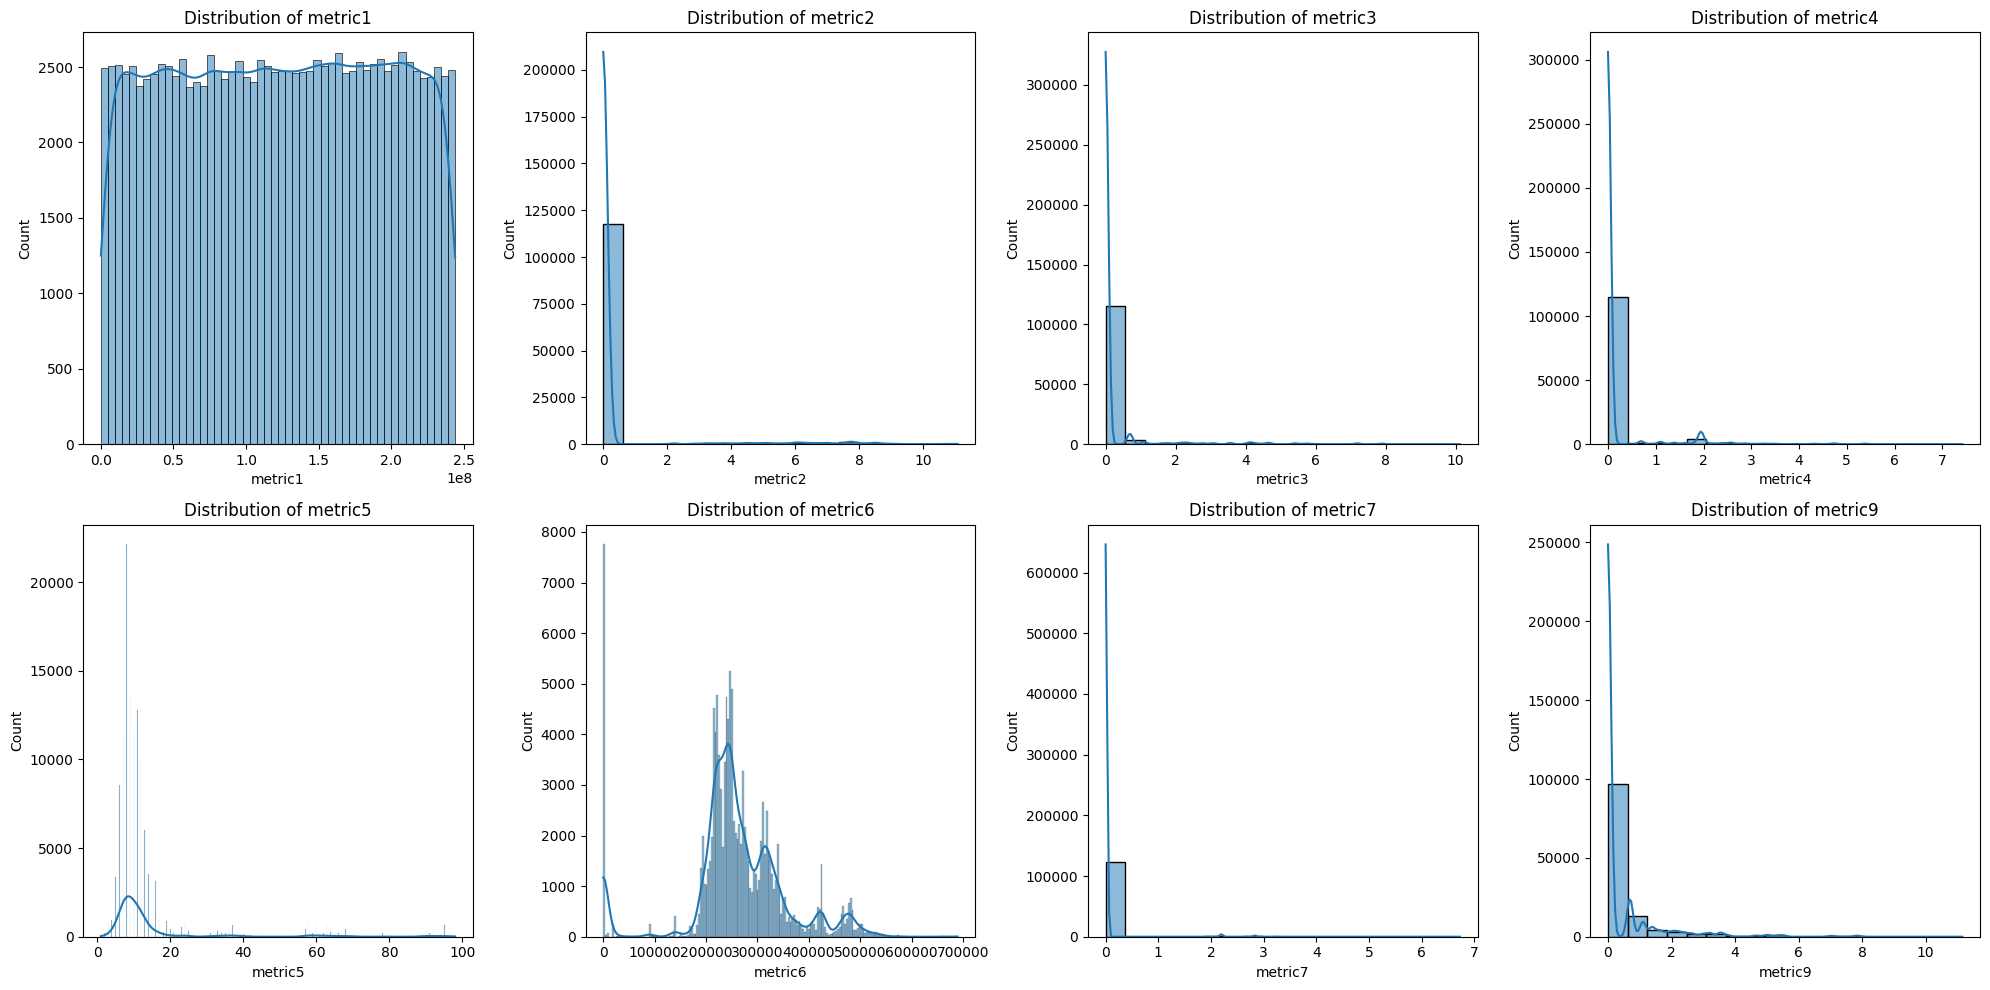

In [33]:
# Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(4*5, 2*5))
print("Distribution for failure is 0")
mask= df.failure==0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7',  'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Distribution for failure is 1


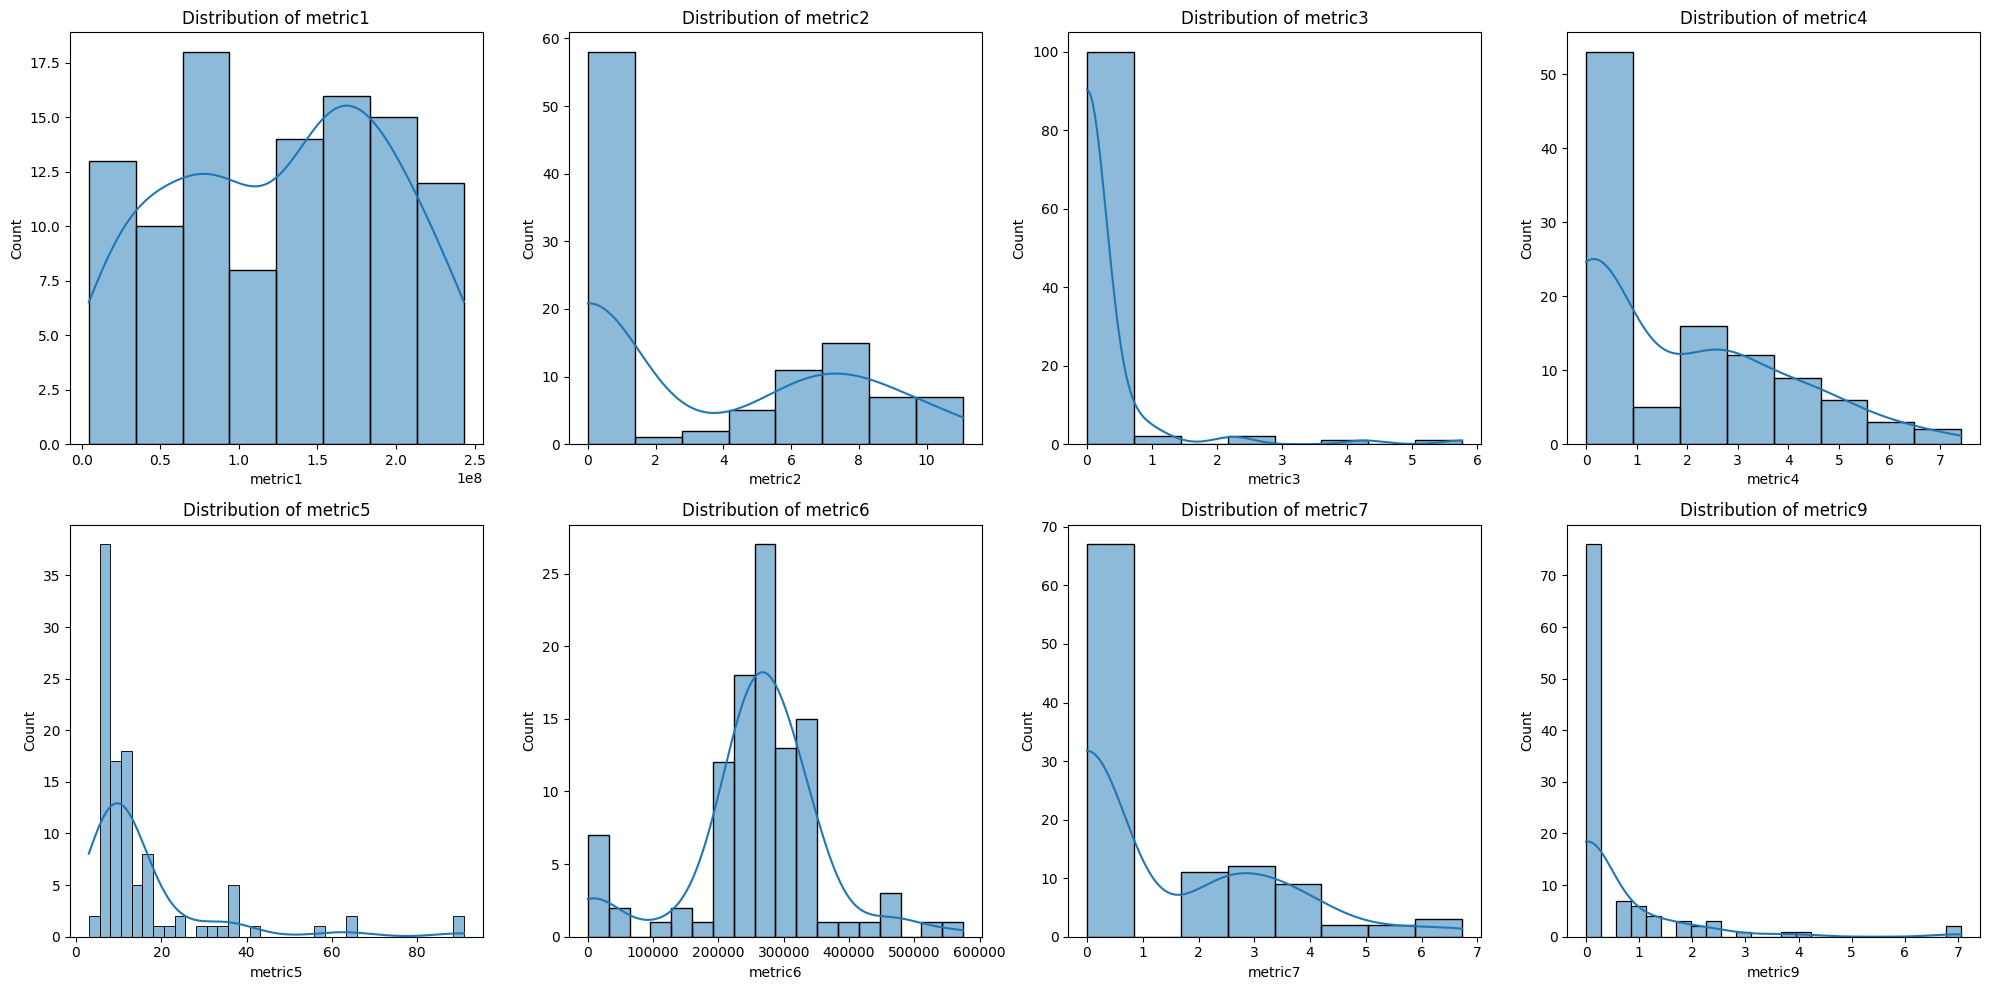

In [34]:
# Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(20, 10))
print("Distribution for failure is 1")
mask= df.failure>0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Failure over Time by Month')

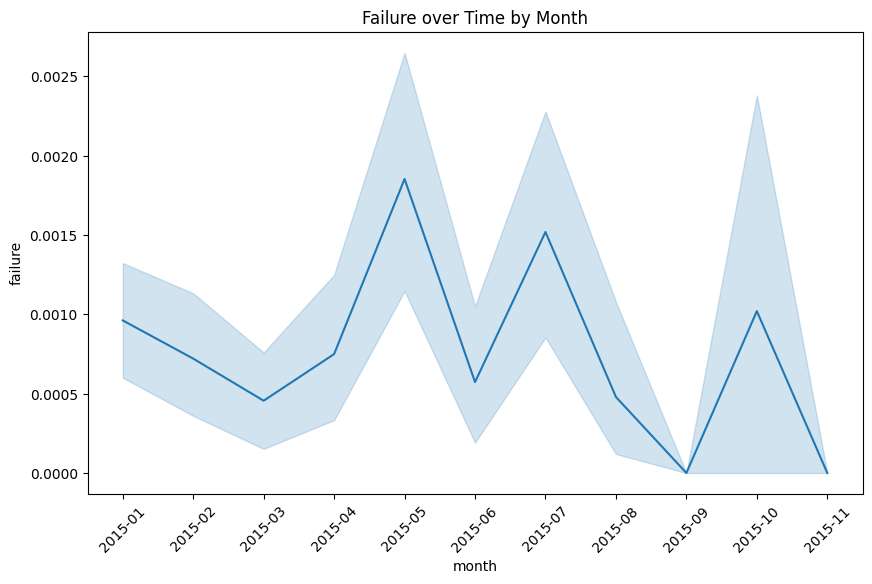

In [35]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract and format the 'month' column for plotting
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.strftime('%Y-%m')

# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")

Text(0.5, 1.0, 'Failure over Time by Week')

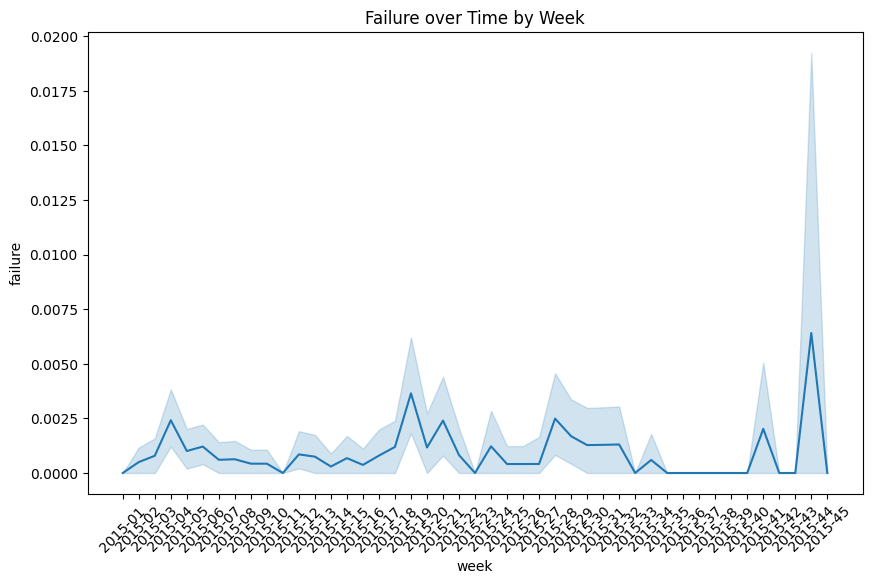

In [36]:
# Extract and format the 'week' column for plotting
df['week'] = df['date'].dt.to_period('W')
df['week'] = df['week'].dt.strftime('%Y-%U')

# Create a line plot to visualize 'failure' over time by week
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Week")

**Step 2: Data Cleaning and Feature Engineering**

Text(0.5, 1.0, 'Correlation Matrix')

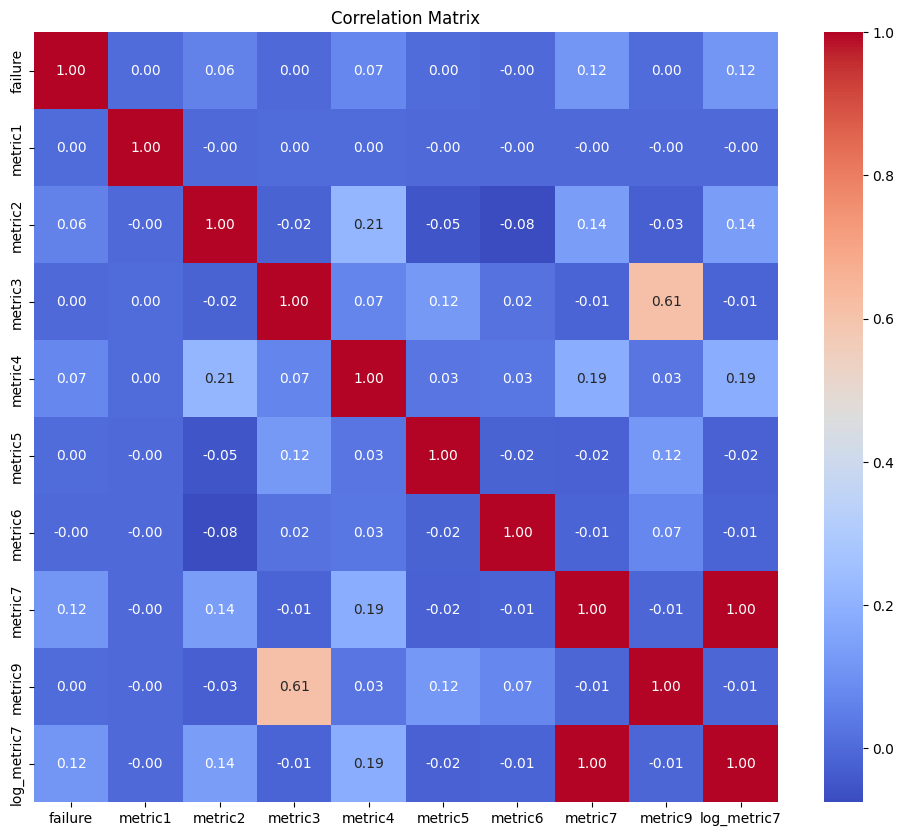

In [38]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")

Due to the overwhelming majority of zero values in the target variable, correlation with other features is likely to be uninformative.

Text(0.5, 1.0, "Distribution of 'failure'")

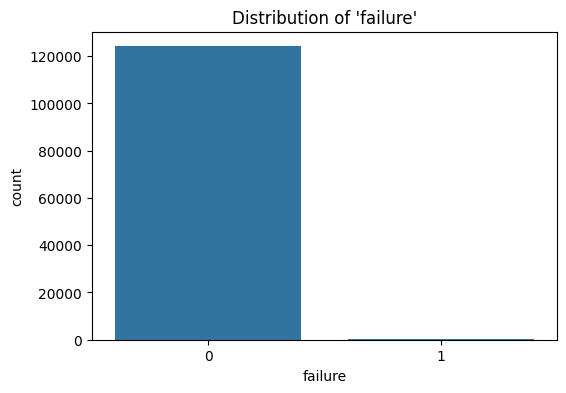

In [39]:
# Create a countplot to visualize the distribution of 'failure'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='failure')
plt.title("Distribution of 'failure'")

The observed class imbalance highlights an undersampling problem, as the failure class constitutes only a small fraction of the data.

In [40]:
# Extract day of week, day of month, and is_weekend features from the 'date' column
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

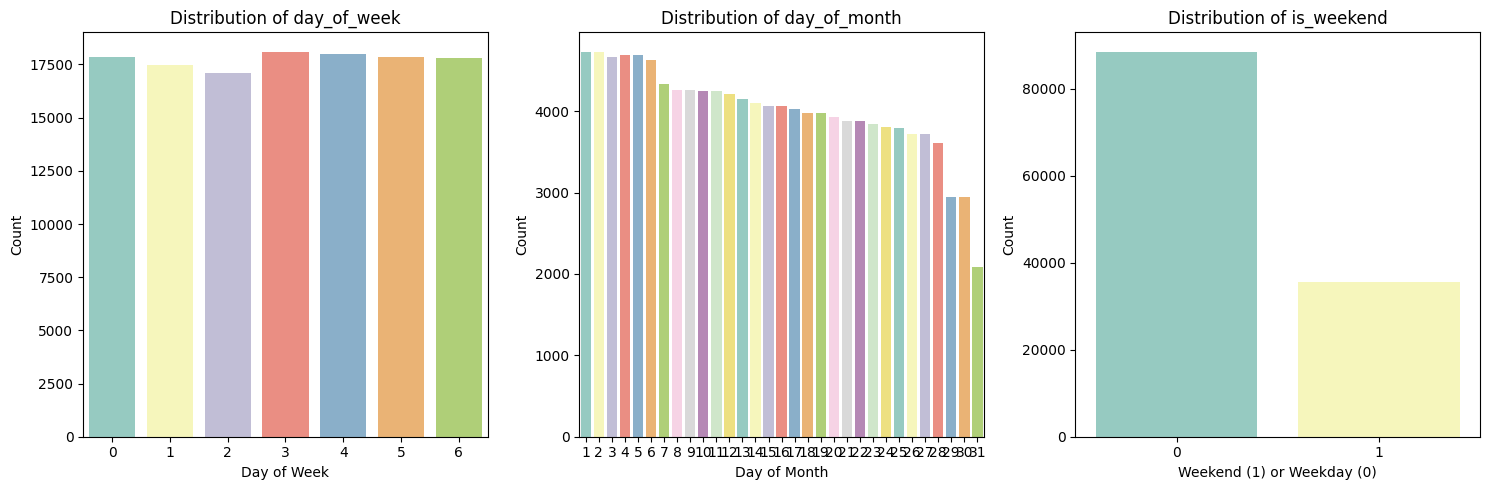

In [41]:
# Create subplots to visualize the distribution of day_of_week, day_of_month, and is_weekend
plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131)
sns.countplot(data=df, x='day_of_week', palette='Set3')
plt.title("Distribution of day_of_week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# Distribution of 'day_of_month'
plt.subplot(132)
sns.countplot(data=df, x='day_of_month', palette='Set3')
plt.title("Distribution of day_of_month")
plt.xlabel("Day of Month")
plt.ylabel("Count")

# Distribution of 'is_weekend'
plt.subplot(133)
sns.countplot(data=df, x='is_weekend', palette='Set3')
plt.title("Distribution of is_weekend")
plt.xlabel("Weekend (1) or Weekday (0)")
plt.ylabel("Count")

# Show the subplots
plt.tight_layout()
plt.show()

In [42]:
# Extract the month number and week number from the 'date' column and drop the 'date' column
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df = df.drop(['date'], axis=1)

# Check the DataFrame information after these transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124242 entries, 0 to 124241
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   failure       124242 non-null  int64  
 1   metric1       124242 non-null  int64  
 2   metric2       124242 non-null  float64
 3   metric3       124242 non-null  float64
 4   metric4       124242 non-null  float64
 5   metric5       124242 non-null  int64  
 6   metric6       124242 non-null  int64  
 7   metric7       124242 non-null  float64
 8   metric9       124242 non-null  float64
 9   log_metric7   124242 non-null  float64
 10  device_model  124242 non-null  object 
 11  month         124242 non-null  int32  
 12  week          124242 non-null  UInt32 
 13  day_of_week   124242 non-null  int32  
 14  day_of_month  124242 non-null  int32  
 15  is_weekend    124242 non-null  int64  
dtypes: UInt32(1), float64(6), int32(3), int64(5), object(1)
memory usage: 13.4+ MB


In [43]:
df=pd.get_dummies(df,drop_first=True)

In [44]:
#pip install imblearn

In [45]:
# Import the necessary library for undersampling
from imblearn.under_sampling import RandomUnderSampler

In [46]:
# Create a copy of the DataFrame 'df'
X = df.copy()

# Create the target variable 'Y' by selecting the 'failure' column
Y = df["failure"]

# Remove the 'failure' column from the feature matrix 'X'
X.drop("failure", axis=1, inplace=True)

In [47]:
# Create an instance of the RandomUnderSampler with a fixed random state
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
X_resampled, y_resampled = rus.fit_resample(X, Y)

In [48]:
# Create a new DataFrame 'under_sample' by copying the resampled features and adding the 'failure' column back
under_sample = X_resampled.copy()
under_sample["failure"] = y_resampled

In [49]:
# Display a random sample of 10 rows from the under-sampled dataset
under_sample.sample(10)

metric1   metric2   metric3   metric4  metric5  metric6   metric7  \
117573  199877312  0.000000  0.000000  0.000000       11   226285  0.000000   
66621   151565000  0.000000  0.000000  0.000000        8   274829  4.290459   
96493   149049520  0.000000  5.765191  0.000000        6   323187  0.000000   
75525    63332432  0.000000  0.000000  0.000000       16   337006  0.000000   
65423   180215128  7.721792  0.000000  2.564949        8   190301  3.496508   
72982     9687800  0.000000  0.000000  0.000000        6   275485  0.000000   
86092   193511720  0.000000  0.000000  0.000000       12   256774  0.000000   
93571    87115256  0.000000  0.000000  2.564949       10   268094  0.000000   
6063    162100200  0.000000  0.000000  0.000000       13   239630  0.000000   
21698    52678888  0.000000  0.000000  1.945910       11   209351  0.000000   

         metric9  log_metric7  month  week  day_of_week  day_of_month  \
117573  0.000000     0.000000      9    36            6             6   
66621   0.000000     4.290459      4    15            0             6   
96493   2.995732     0.000000      6    26            4            26   
75525   0.000000     0.000000      4    18            2            29   
65423   0.000000     3.496508      4    14            4             3   
72982   0.000000     0.000000      4    17            2            22   
86092   0.000000     0.000000      5    22            3            28   
93571   0.000000     0.000000      6    25            3            18   
6063    0.000000     0.000000      1     2            1             6   
21698   0.000000     0.000000      1     5            1            27   

        is_weekend  device_model_S1F1  device_model_W1F0  device_model_W1F1  \
117573           1               True              False              False   
66621            0              False              False              False   
96493            0              False              False              False   
75525            0               True              False              False   
65423            0              False              False               True   
72982            0              False              False              False   
86092            0              False              False              False   
93571            0              False               True              False   
6063             0              False              False              False   
21698            0               True              False              False   

        device_model_Z1F0  device_model_Z1F1  failure  
117573              False              False        0  
66621               False              False        1  
96493                True              False        1  
75525               False              False        0  
65423               False              False        1  
72982               False              False        0  
86092               False              False        1  
93571               False              False        1  
6063                False              False        0  
21698               False              False        0

Text(0.5, 1.0, "Distribution of 'failure'")

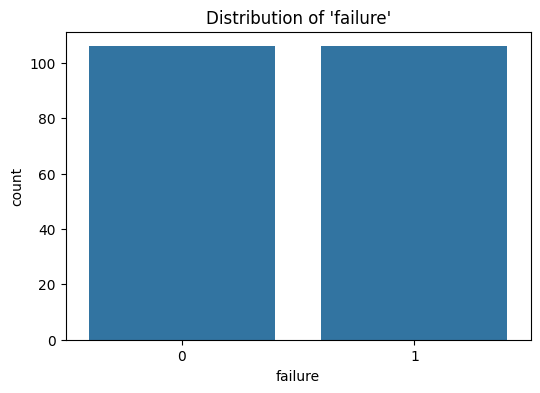

In [50]:
# Create a countplot to visualize the distribution of 'failure' in the under-sampled dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=under_sample, x='failure')
plt.title("Distribution of 'failure'")

As we can see it is equal now.

**Step 3: Train-Test Split and Feature Scaling**

### Hyperparameter Tuning Justification
Only models achieving an F1 score of approximately 65% or higher were selected for hyperparameter tuning. This strategy ensures computational efficiency while focusing on models with promising baseline performance.

In [51]:
# Import the necessary libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create feature matrix 'X_norm' and target variable 'y_norm'
X_norm = under_sample.drop(['failure'], axis=1)
y_norm = under_sample['failure']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
# Import various classification algorithms and evaluation metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate multiple classifiers and return a DataFrame with metrics
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        BernoulliNB(),
        SVC(),
        LogisticRegression(),
        SGDClassifier(),
    ]

    # Define the names of classifiers
    classifier_names = [
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees',
        'DecisionTree',
        'KNeighbors',
        'GaussianNB',
        'BernoulliNB',
        'SVC',
        'LogisticRegression',
        'SGD',
    ]

    # Create an empty DataFrame for metrics
    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)

    # Evaluate each classifier and store the metrics
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics

# Step 4: Evaluate models
metrics = evaluate_model(x_train, y_train, x_test, y_test)

In [54]:
metrics

Accuracy Precision    Recall        F1
GradientBoost       0.860465  0.909091  0.833333  0.869565
AdaBoost            0.860465     0.875     0.875     0.875
ExtraTrees          0.860465  0.909091  0.833333  0.869565
GaussianNB          0.860465       1.0      0.75  0.857143
SVC                 0.860465       1.0      0.75  0.857143
RandomForest        0.837209  0.904762  0.791667  0.844444
LogisticRegression  0.837209  0.947368      0.75  0.837209
BernoulliNB         0.813953       0.9      0.75  0.818182
SGD                 0.813953  0.785714  0.916667  0.846154
KNeighbors          0.767442    0.9375     0.625      0.75
DecisionTree        0.744186  0.782609      0.75  0.765957

To ensure efficient use of resources, hyperparameter tuning will be limited to models demonstrating an F1 score of approximately 65% during the baseline assessment phase.

In [55]:
#pip install optuna

In [57]:
#pip install optuna # Uncomment this line
!pip install optuna # Add this line to actually execute the installation

import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.8 MB/s eta 0:00:00


**GradientBoosting**

In [58]:
def objective_gb(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
    }

    # Initialize the classifier with hyperparameters
    clf = GradientBoostingClassifier(**params, random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [59]:
def create_study(objective):
    # Create an Optuna study

    # Set logging level to WARNING to suppress unnecessary output
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

    # Run the optimization
    study.optimize(objective, n_trials=100)  # You can adjust the number of trials

    # Get the best hyperparameters from the study
    best_params = study.best_params
    best_f1 = study.best_value
    print(f'Best hyperparameters: {best_params}')
    print(f'Best f1 score: {best_f1}')
    return best_params

In [60]:
best_params=create_study(objective_gb)
best_gb = GradientBoostingClassifier(**best_params, random_state=42)
y_pred_gb=best_gb.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_estimators': 364, 'learning_rate': 0.27812584409048907, 'max_depth': 3, 'min_samples_split': 0.3721301524057574}
Best f1 score: 0.8979591836734694


**RandomForest**

In [62]:
def objective_rf(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_uniform('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_uniform('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['log2', 'sqrt'])  # Only suggest valid options

    # Create and train the RandomForestClassifier with the suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [63]:
best_params=create_study(objective_rf)
best_rf = RandomForestClassifier(**best_params, random_state=42)
y_pred_rf=best_rf.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_estimators': 72, 'max_depth': 12, 'min_samples_split': 0.1046240848467267, 'min_samples_leaf': 0.10645279475772043, 'max_features': 'sqrt'}
Best f1 score: 0.7906976744186046


**AdaBoost**

In [64]:
# Define the objective function for Optuna
def objective_ab(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int("n_estimators", 50, 200)  # Number of weak learners
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0)  # Learning rate
    algorithm = trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"])  # AdaBoost algorithm

    # Create an AdaBoostClassifier with the suggested hyperparameters
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=42
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [67]:
best_params=create_study(objective_ab)
best_ab = AdaBoostClassifier(**best_params, random_state=42)
y_pred_ab=best_ab.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_estimators': 192, 'learning_rate': 0.8812020462150828, 'algorithm': 'SAMME'}
Best f1 score: 0.8936170212765957


In [66]:
# Define the objective function for Optuna
def objective_ab(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int("n_estimators", 50, 200)  # Number of weak learners
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0)  # Learning rate
    # Corrected: Only suggest 'SAMME' as per the error message
    algorithm = trial.suggest_categorical("algorithm", ["SAMME"])  # AdaBoost algorithm

    # Create an AdaBoostClassifier with the suggested hyperparameters
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=42
    )

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

**ExtraTrees**

In [68]:
import optuna
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

def objective_etc(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 32)
    min_samples_split = trial.suggest_float("min_samples_split", 0.1, 1.0)
    min_samples_leaf = trial.suggest_float("min_samples_leaf", 0.1, 0.5)

    # Create an ExtraTrees classifier with the suggested hyperparameters
    clf = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # You can set a random seed for reproducibility
    )

    # Fit the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [69]:
best_params=create_study(objective_etc)
best_etc = ExtraTreesClassifier(**best_params, random_state=42)
y_pred_etc=best_etc.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_estimators': 875, 'max_depth': 6, 'min_samples_split': 0.36574665091163605, 'min_samples_leaf': 0.16007514629587538}
Best f1 score: 0.8695652173913043


**Decision Tree**

In [70]:
# Define the objective function to optimize
def objective_dt(trial):
    # Define hyperparameters to search and their respective ranges
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_uniform('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_uniform('min_samples_leaf', 0.1, 0.5)

    # Create a DecisionTree classifier with the suggested hyperparameters
    clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # Set a random state for reproducibility
    )

    # Fit the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [71]:
best_params=create_study(objective_dt)
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
y_pred_dt=best_dt.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 0.6243974953272058, 'min_samples_leaf': 0.36033579743671207}
Best f1 score: 0.7017543859649122


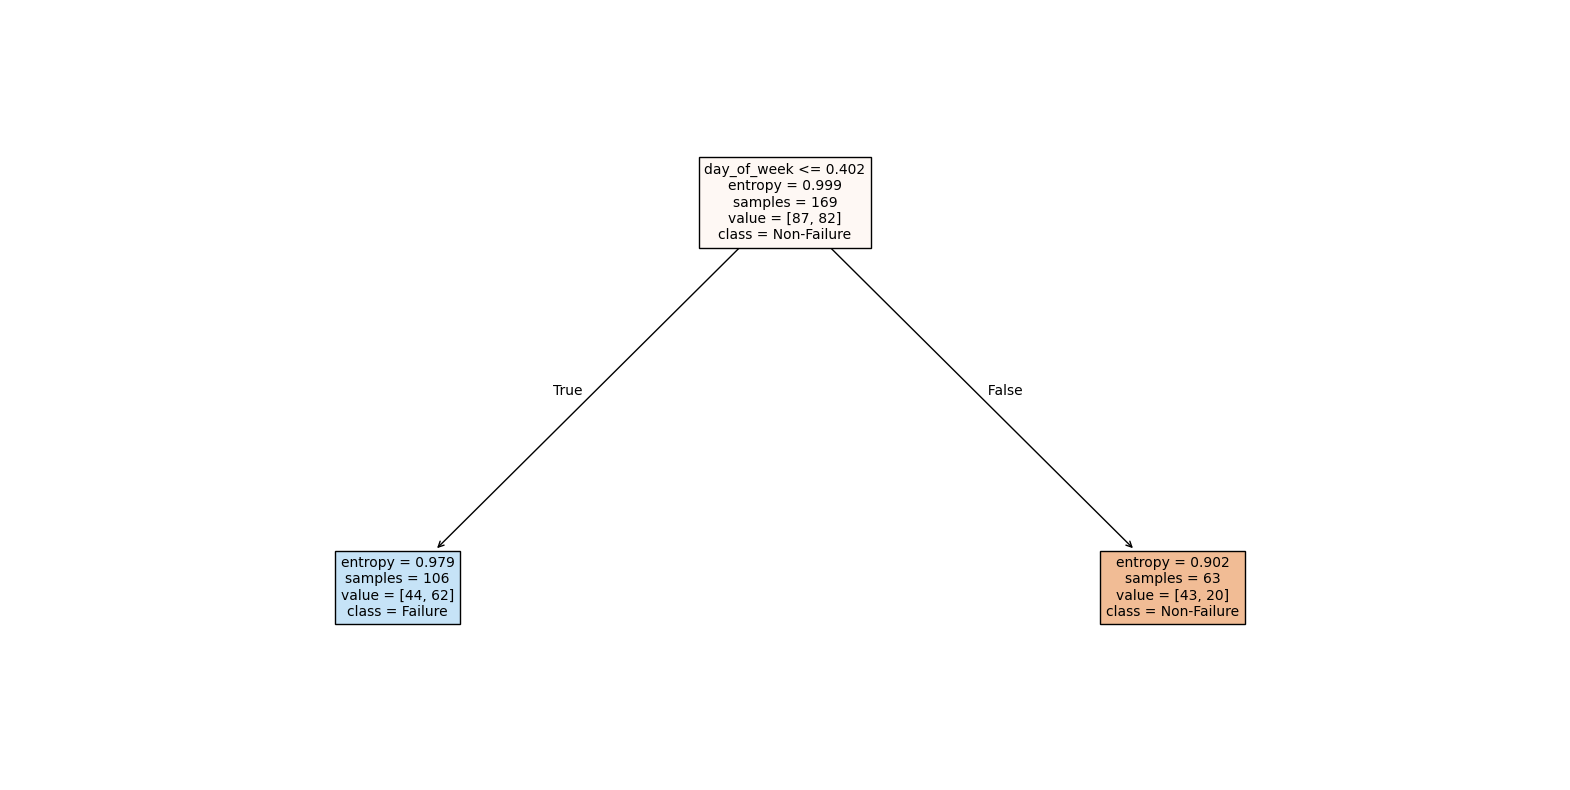

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=df.drop("failure",axis=1).columns.to_list(), class_names=["Non-Failure", "Failure"], filled=True, fontsize=10)
plt.show()

**KNN**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import optuna

def objective_knn(trial):
    # Define hyperparameters to optimize
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 20),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2),  # p=1 for Manhattan distance, p=2 for Euclidean distance
    }

    # Initialize the classifier with hyperparameters
    clf = KNeighborsClassifier(**params)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [74]:
best_params=create_study(objective_knn)
best_knn = KNeighborsClassifier(**best_params)
y_pred_knn=best_knn.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2}
Best f1 score: 0.7906976744186046


**GaussianNB**

In [75]:
best_gnb = GaussianNB()
y_pred_gnb=best_gnb.fit(x_train, y_train).predict(x_test)

**BernoulliNB**

In [76]:
def objective_bnb(trial):
    # Define hyperparameters to optimize
    params = {
        'alpha': trial.suggest_loguniform('alpha', 1e-10, 1.0),
        'binarize': trial.suggest_float('binarize', 0.0, 1.0),
        'fit_prior': trial.suggest_categorical('fit_prior', [True, False]),
    }

    # Initialize the classifier with hyperparameters
    clf = BernoulliNB(**params)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)


    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [77]:
best_params=create_study(objective_bnb)
best_bnb = BernoulliNB(**best_params)
y_pred_bnb=best_bnb.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'alpha': 0.0001474676467532495, 'binarize': 0.616951378320521, 'fit_prior': False}
Best f1 score: 0.8571428571428571


**SVC**

In [78]:
def objective_svc(trial):
    # Define hyperparameters to optimize
    params = {
        'C': trial.suggest_loguniform('C', 1e-3, 1e3),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'degree': trial.suggest_int('degree', 2, 5) if trial.params['kernel'] == 'poly' else 1,
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']) if trial.params['kernel'] in ['rbf', 'poly', 'sigmoid'] else 'scale',
    }

    # Initialize the classifier with hyperparameters
    clf = SVC(**params, random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [79]:
best_params=create_study(objective_svc)
best_svc = SVC(**best_params)
y_pred_svc=best_svc.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'C': 0.15272285160428337, 'kernel': 'linear'}
Best f1 score: 0.8571428571428571


**LogisticRegression**

In [82]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=1000)
# Use the correctly named scaled training data features
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [83]:
def objective_lr(trial):
    # Define hyperparameters to optimize
    params = {
        'C': trial.suggest_loguniform('C', 1e-5, 1e5),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs']),
    }

    # Initialize the classifier with hyperparameters
    clf = LogisticRegression(**params, random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [84]:
best_params=create_study(objective_lr)
best_lr = LogisticRegression(**best_params)
y_pred_lr=best_lr.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'C': 886.7937195241515, 'solver': 'lbfgs'}
Best f1 score: 0.8372093023255814


**Step 5: Model Evaluation**

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

# Use the correctly named scaled test data features (x_test)
y_pred = model.predict(x_test)

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.95      0.75      0.84        24

    accuracy                           0.84        43
   macro avg       0.85      0.85      0.84        43
weighted avg       0.86      0.84      0.84        43

Confusion Matrix:

[[18  1]
 [ 6 18]]


In [88]:
import pandas as pd  # Pandas for data manipulation
import pandas_profiling

import matplotlib.pyplot as plt  # Matplotlib for data visualization
%matplotlib inline
import numpy as np  # NumPy for numerical operations
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns  # Seaborn for data visualization

# Import machine learning models
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # For binary classification
from sklearn.naive_bayes import MultinomialNB  # For multi-class classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier

# Import machine learning evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import tools for data splitting
from sklearn.model_selection import train_test_split

In [89]:
import pandas as pd  # Pandas for data manipulation
import pandas_profiling

import matplotlib.pyplot as plt  # Matplotlib for data visualization
%matplotlib inline
import numpy as np  # NumPy for numerical operations
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import seaborn as sns  # Seaborn for data visualization

# Import machine learning models
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # For binary classification
from sklearn.naive_bayes import MultinomialNB  # For multi-class classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier

# Import machine learning evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import tools for data splitting
from sklearn.model_selection import train_test_split

In [90]:
# Import various classification algorithms and evaluation metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate multiple classifiers and return a DataFrame with metrics
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        BernoulliNB(),
        SVC(),
        LogisticRegression(),
        SGDClassifier(),
    ]

    # Define the names of classifiers
    classifier_names = [
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees',
        'DecisionTree',
        'KNeighbors',
        'GaussianNB',
        'BernoulliNB',
        'SVC',
        'LogisticRegression',
        'SGD',
    ]

    # Create an empty DataFrame for metrics
    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)

    # Evaluate each classifier and store the metrics
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics

# Step 4: Evaluate models
metrics = evaluate_model(x_train, y_train, x_test, y_test)

In [91]:
def objective_rf(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_uniform('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_uniform('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['log2', 'sqrt'])  # Only suggest valid options

    # Create and train the RandomForestClassifier with the suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

**SGDClassifier**

In [92]:
def objective_sgd(trial):
    # Define hyperparameters to optimize
    params = {
        'loss': trial.suggest_categorical('loss', ['hinge', 'log', 'modified_huber']),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet']),
        'alpha': trial.suggest_loguniform('alpha', 1e-6, 1e-1),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive']),
        'eta0': trial.suggest_loguniform('eta0', 1e-5, 1e-1),
    }

    # Initialize the classifier with hyperparameters
    clf = SGDClassifier(**params, random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

In [94]:
# Import various classification algorithms and evaluation metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna # Import optuna

# Define a function to evaluate multiple classifiers and return a DataFrame with metrics
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        BernoulliNB(),
        SVC(),
        LogisticRegression(),
        SGDClassifier(),
    ]

    # Define the names of classifiers
    classifier_names = [
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees',
        'DecisionTree',
        'KNeighbors',
        'GaussianNB',
        'BernoulliNB',
        'SVC',
        'LogisticRegression',
        'SGD',
    ]

    # Create an empty DataFrame for metrics
    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)

    # Evaluate each classifier and store the metrics
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics

# Step 4: Evaluate models
metrics = evaluate_model(x_train, y_train, x_test, y_test)

def create_study(objective):
    # Create an Optuna study

    # Set logging level to WARNING to suppress unnecessary output
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(direction='maximize')  # We want to maximize accuracy

    # Run the optimization
    study.optimize(objective, n_trials=100)  # You can adjust the number of trials

    # Get the best hyperparameters from the study
    best_params = study.best_params
    best_f1 = study.best_value
    print(f'Best hyperparameters: {best_params}')
    print(f'Best f1 score: {best_f1}')
    return best_params


def objective_sgd(trial):
    # Define hyperparameters to optimize
    params = {
        'loss': trial.suggest_categorical('loss', ['hinge', 'log_loss', 'modified_huber']), # Changed 'log' to 'log_loss'
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet']),
        'alpha': trial.suggest_loguniform('alpha', 1e-6, 1e-1),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive']),
        'eta0': trial.suggest_loguniform('eta0', 1e-5, 1e-1),
    }

    # Initialize the classifier with hyperparameters
    clf = SGDClassifier(**params, random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate F1 score as the objective to maximize
    f1 = f1_score(y_test, y_pred)

    return f1

best_params=create_study(objective_sgd)
best_sgd = SGDClassifier(**best_params)
y_pred_sgd=best_sgd.fit(x_train, y_train).predict(x_test)

Best hyperparameters: {'loss': 'modified_huber', 'penalty': 'l2', 'alpha': 5.114540294758135e-06, 'learning_rate': 'constant', 'eta0': 0.027341738832430885}
Best f1 score: 0.8571428571428571


**Voting Classifier**

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('gb', best_gb), ('rf', best_rf), ('ab', best_ab), ('etc', best_etc), ('dt', best_dt), ('knn', best_knn), ('gnb', best_gnb), ('bnb', best_bnb), ('svc', best_svc), ('lr', best_lr), ('sgd', best_sgd)], voting='hard')

# Train the Voting Classifier on the training data
voting_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_vh = voting_clf.predict(x_test)

**Comparing Models**


Model: Model Gradient Boosting
Precision: 0.8800
Recall: 0.9167
F1 Score: 0.8980
Accuracy: 0.8837

Model: Model Random Forest
Precision: 0.8947
Recall: 0.7083
F1 Score: 0.7907
Accuracy: 0.7907

Model: Model AdaBoost
Precision: 0.9130
Recall: 0.8750
F1 Score: 0.8936
Accuracy: 0.8837

Model: Model Extra Tree
Precision: 0.9091
Recall: 0.8333
F1 Score: 0.8696
Accuracy: 0.8605

Model: Decison Tree
Precision: 0.6061
Recall: 0.8333
F1 Score: 0.7018
Accuracy: 0.6047

Model: KNN
Precision: 0.8947
Recall: 0.7083
F1 Score: 0.7907
Accuracy: 0.7907

Model: GaussianNB
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
Accuracy: 0.8605

Model: BernoulliNB
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
Accuracy: 0.8605

Model: SVC
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
Accuracy: 0.8605

Model: LogisticRegression
Precision: 0.9474
Recall: 0.7500
F1 Score: 0.8372
Accuracy: 0.8372

Model: SGDClassifier
Precision: 0.9474
Recall: 0.7500
F1 Score: 0.8372
Accuracy: 0.8372

Model: Hard Voting Cl

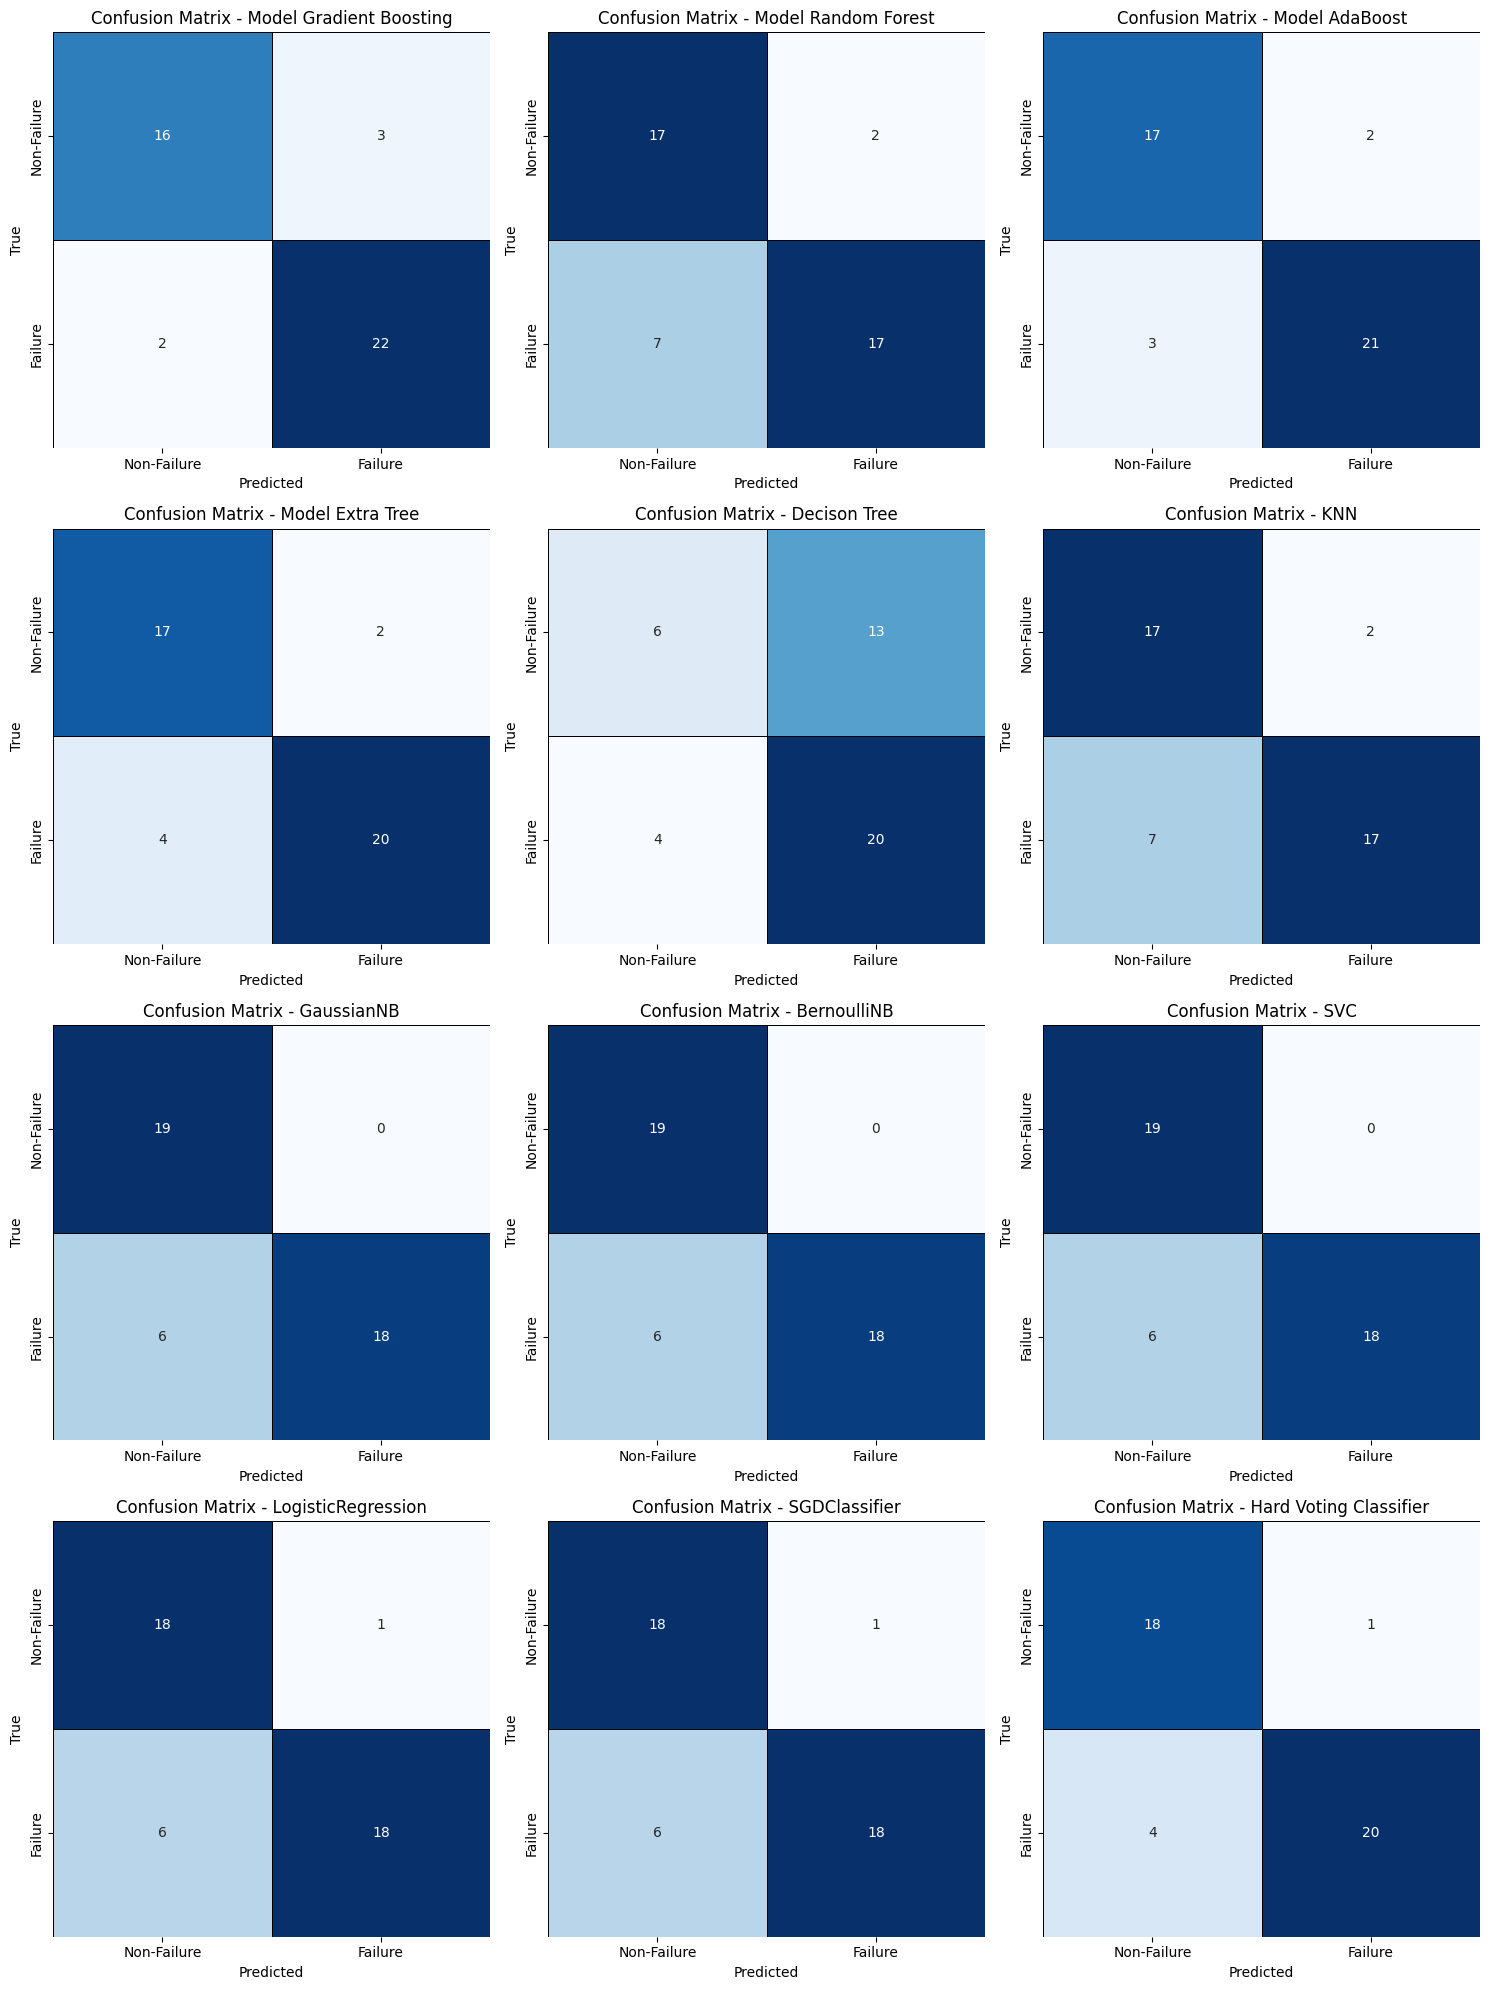


=====Best Model=====

Model: Model Gradient Boosting
Precision: 0.8800
Recall: 0.9167
F1 Score: 0.8980
Accuracy: 0.8837


In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Function to calculate evaluation metrics
def calculate_evaluation_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, f1, accuracy
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", cbar=False, xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(title)
# Initialize variables to store best metrics
best_model = ""
best_f1 = 0.0
best_precision = 0.0
best_recall = 0.0
best_accuracy = 0.0

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(3*5, 4*5))

# Plot each confusion matrix and find the best model
models = [
    ("Model Gradient Boosting", y_pred_gb),
    ("Model Random Forest", y_pred_rf),
    ("Model AdaBoost", y_pred_ab),
    ("Model Extra Tree", y_pred_etc),
    ("Decison Tree", y_pred_dt),
    ("KNN", y_pred_knn),
    ("GaussianNB", y_pred_gnb),
    ("BernoulliNB",y_pred_bnb),
    ("SVC", y_pred_svc),
    ("LogisticRegression", y_pred_lr),
    ("SGDClassifier", y_pred_sgd),
    ("Hard Voting Classifier", y_pred_vh),
]

for (model_name, y_pred), ax in zip(models, axes.flatten()):
    plot_confusion_matrix(ax, y_test, y_pred, f"Confusion Matrix - {model_name}")

    # Calculate evaluation metrics
    precision, recall, f1, accuracy = calculate_evaluation_metrics(y_test, y_pred)

    # Print evaluation metrics
    print(f"\nModel: {model_name}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # Update best model if current model has higher F1 score
    if f1 > best_f1:
        best_f1 = f1
        best_model = model_name
        best_precision = precision
        best_recall = recall
        best_accuracy = accuracy



# Adjust layout
plt.tight_layout()
plt.show()

# Print the best model
print("\n=====Best Model=====\n")
print(f"Model: {best_model}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"F1 Score: {best_f1:.4f}")
print(f"Accuracy: {best_accuracy:.4f}")

AUC: 0.8848684210526315


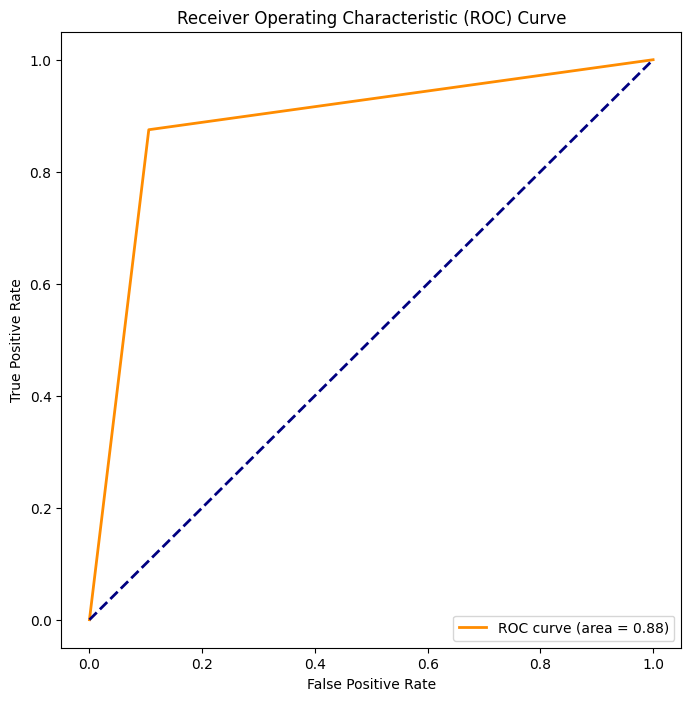

In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ab)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion

This notebook provides a simulation-based implementation of a predictive maintenance system using machine learning techniques. Through exploratory data analysis and the evaluation of multiple classification algorithms, this framework demonstrates how Ethiopian manufacturing industries can leverage sensor data to predict equipment failures in advance. The proposed approach aims to reduce downtime, improve productivity, and form the basis for intelligent maintenance systems in developing industrial sectors.